In [1]:
from a5_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

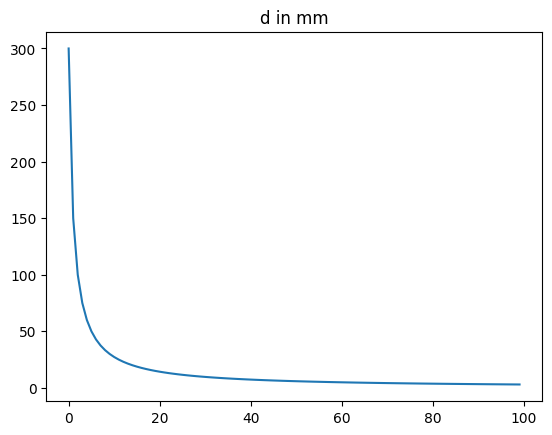

In [2]:
# (b) Write a script that computes the disparity for a range of values of pz.
# Plot the values to a figure and set the appropriate units to axes. 
# Use the following parameters of the system: focal length is f = 2.5mm and 
# stereo system baseline is T = 12cm

def compute_disparity(pz, f, T):
    d = T * f / pz
    return d

f = 2.5
T = 120
pz = np.linspace(1, 100, num=100)
d = compute_disparity(pz, f, T)
plt.plot(d)
plt.title('d in mm')
plt.show()

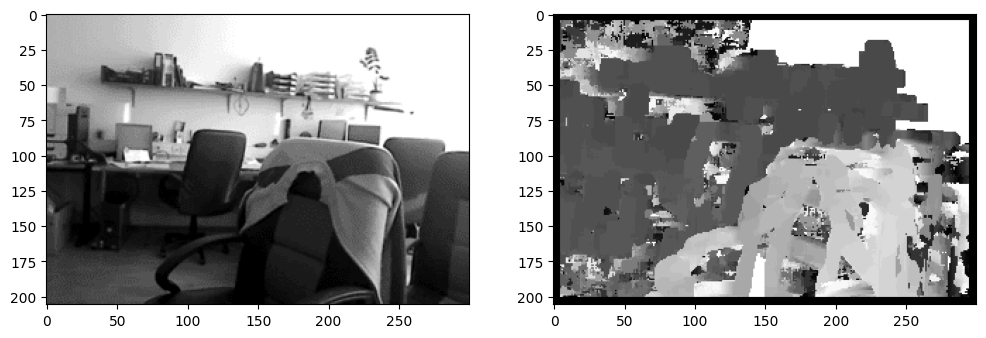

In [3]:
# (d) Write a script that calculates the disparity for an image pair.
def calculate_ncc(window1, window2):
    mean1 = np.mean(window1)
    mean2 = np.mean(window2)
    numerator = np.sum((window1 - mean1) * (window2 - mean2))
    epsilon = 1e-8
    denominator = np.sqrt(np.sum((window1 - mean1)**2) * np.sum((window2 - mean2)**2)) + epsilon
    ncc = numerator / denominator
    return ncc

def find_disparity(image1, image2, window_size=10):
    height1, width1 = image1.shape
    height2, width2 = image2.shape
    disparity = np.zeros((height1, width1))
    # go through every pixel in the first image
    for i in range(window_size // 2, height1 - window_size // 2):
        for j in range(window_size // 2, width1 - window_size // 2):
            # calculate a window around the pixel
            window1=image1[i-window_size//2:i+window_size//2+1,j-window_size//2:j+window_size//2+1]
            max_ncc = -2
            max_k = 0
            # look in a range of 35 before and after the pixel in the same line in the second image
            for k in range(max(window_size // 2, j - 35), min(width2 - window_size // 2, j + 35)):
                # calculate a window in the second image
                window2 = image2[i-window_size//2:i+window_size//2+1,k-window_size//2:k+window_size//2+1]
                # calculate normalized cross correlation for the window
                ncc = calculate_ncc(window1, window2)
                # save as a match if it has the highest ncc value
                if ncc > max_ncc:
                    max_ncc = ncc
                    max_k = k
            disparity[i, j] = abs(j - max_k)
    return disparity
office_left = cv2.imread("data/disparity/office_left_resized.png", cv2.IMREAD_GRAYSCALE)
office_right = cv2.imread("data/disparity/office_right_resized.png", cv2.IMREAD_GRAYSCALE)

disparity = find_disparity(office_left, office_right)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(office_left, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(disparity, cmap='gray')

plt.show()